<a href="https://colab.research.google.com/github/aydawudu/A-B-test-results-in-Tableau/blob/main/ANN%20on%20House%20Pricing%20Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
house_df=pd.read_csv('kc_house_data.csv', encoding ='ISO-8859-1')

In [3]:
house_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [4]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
house_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


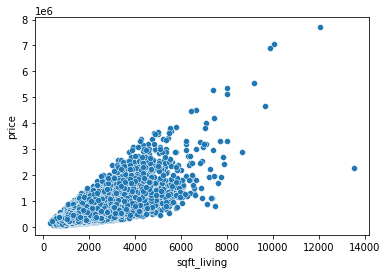

In [6]:
# To visualize data
sns.scatterplot(x='sqft_living', y='price', data=house_df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f67373c5650>,
      dtype=object)

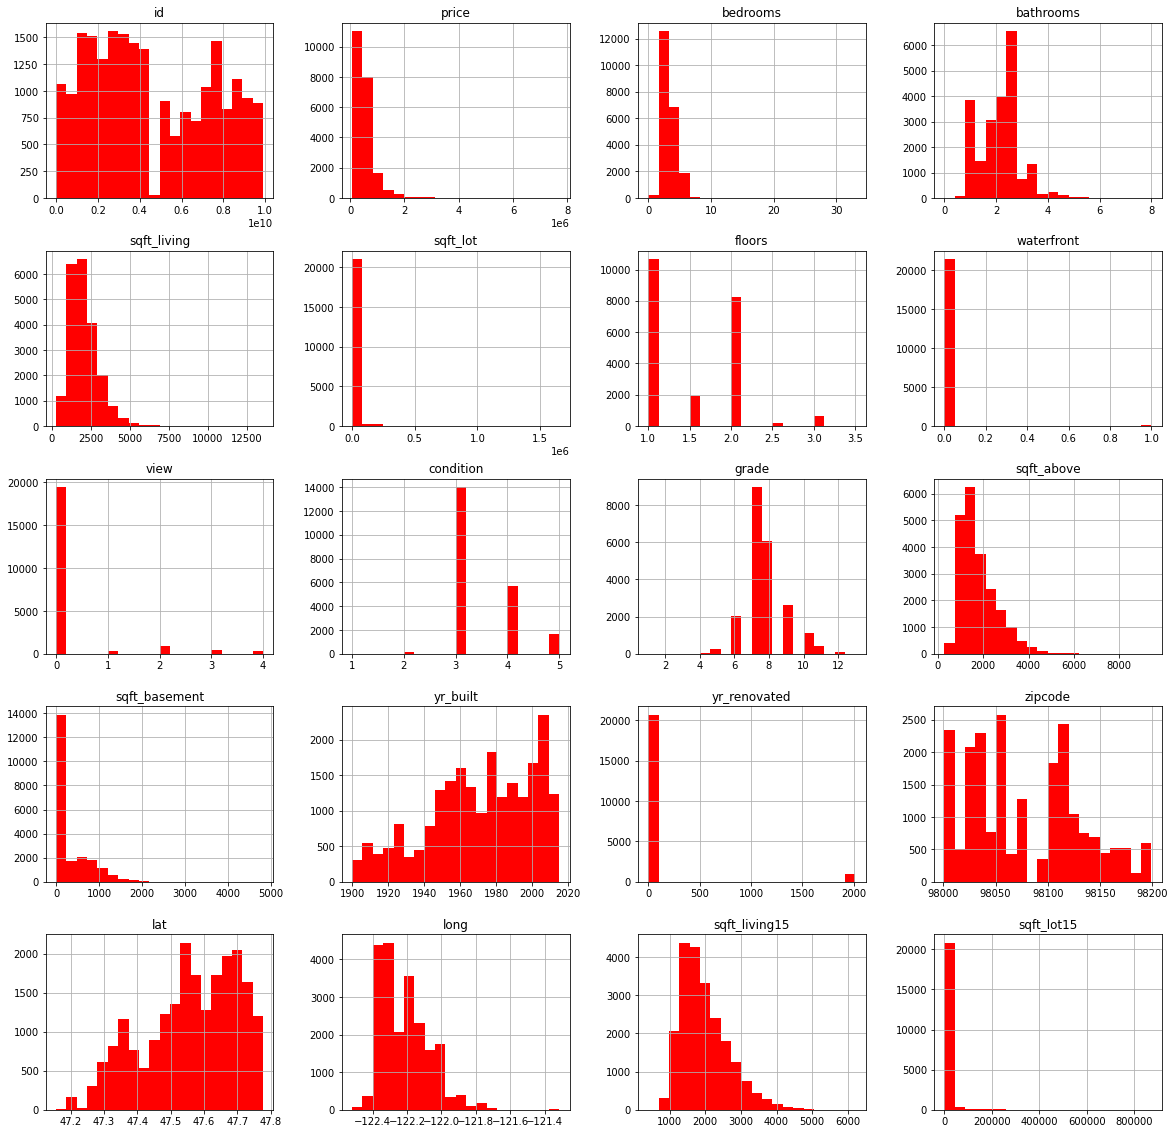

In [7]:
house_df.hist(bins=20, figsize=(20,20), color='r')

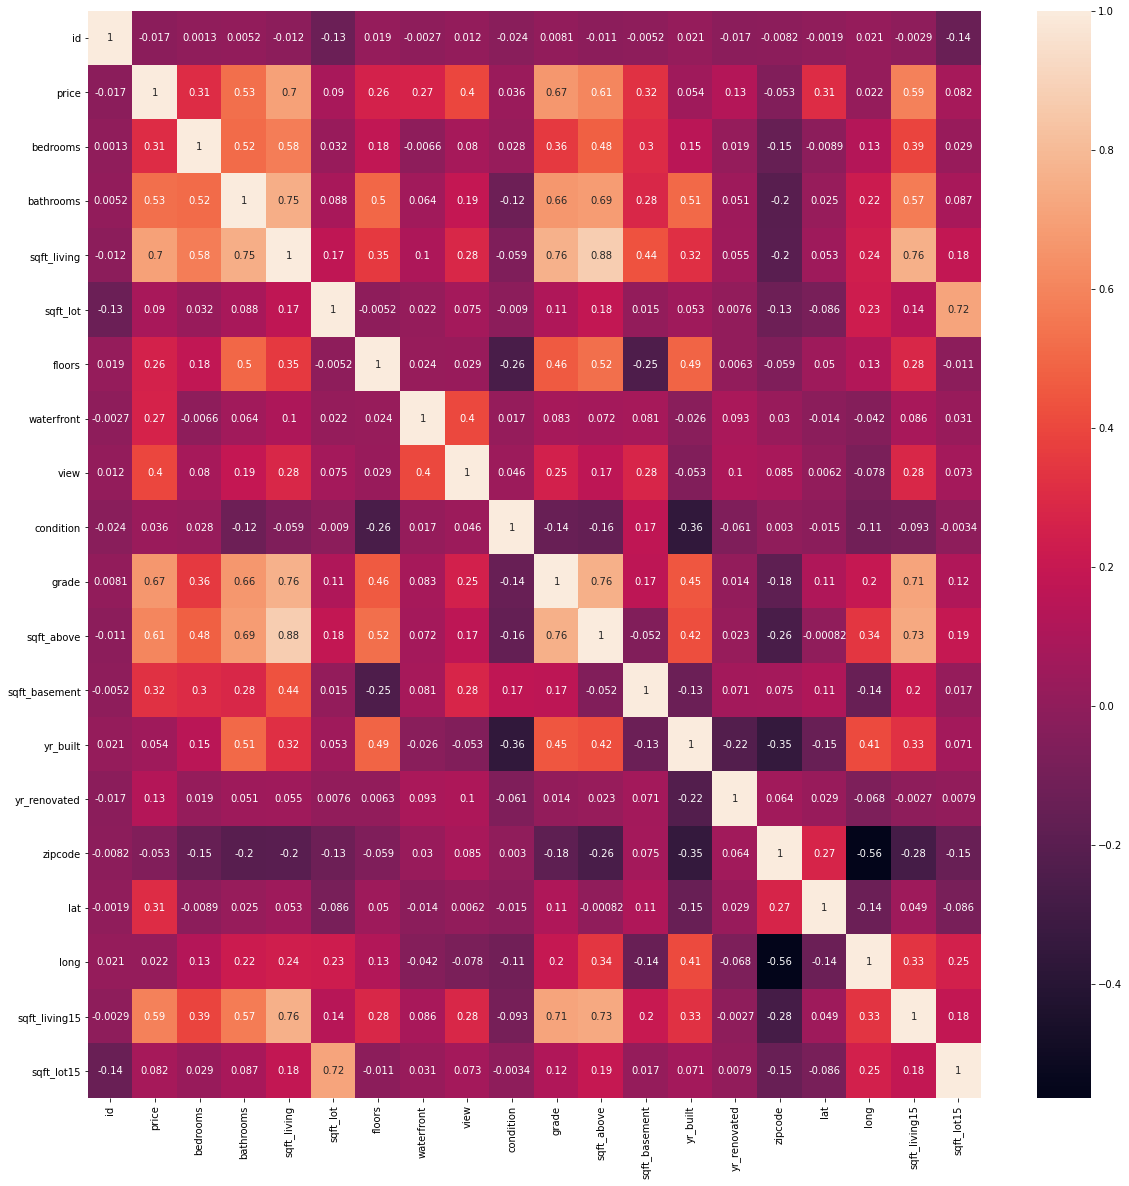

In [8]:
f, ax=plt.subplots(figsize=(20,20))
sns.heatmap(house_df.corr(), annot=True)

In [9]:
# To sample
house_df_sample=house_df[['price', 'bedrooms','bathrooms', 'sqft_living','sqft_lot','sqft_above','sqft_basement','yr_built']]

In [10]:
house_df_sample

,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built
0,221900.0,3,1.00,1180,5650,1180,0,1955
1,538000.0,3,2.25,2570,7242,2170,400,1951
2,180000.0,2,1.00,770,10000,770,0,1933
3,604000.0,4,3.00,1960,5000,1050,910,1965
4,510000.0,3,2.00,1680,8080,1680,0,1987
...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,1530,0,2009
21609,400000.0,4,2.50,2310,5813,2310,0,2014
21610,402101.0,2,0.75,1020,1350,1020,0,2009
21611,400000.0,3,2.50,1600,2388,1600,0,2004


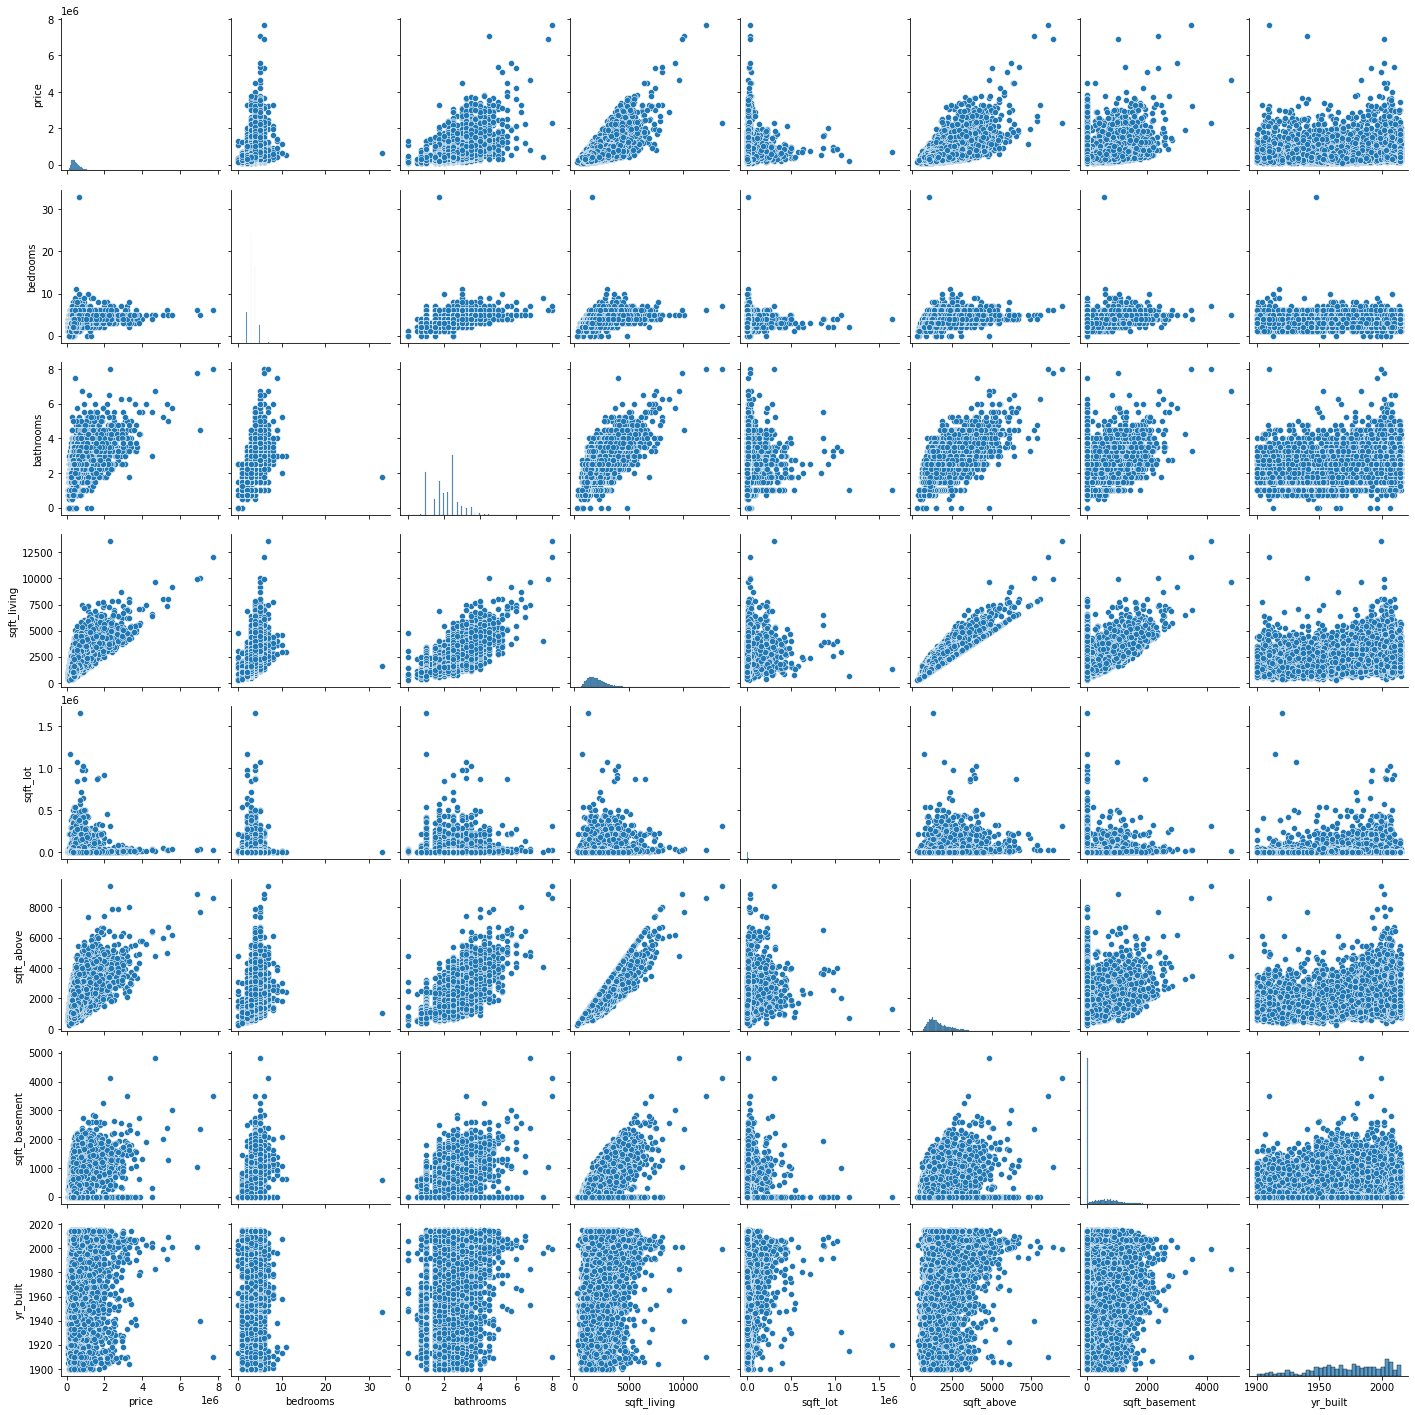

In [11]:
sns.pairplot(house_df_sample)

In [13]:
#To split test and training Data and cleaning
selected_features=['bedrooms','bathrooms', 'sqft_living','sqft_lot','floors','sqft_above','sqft_basement']

In [14]:
X=house_df[selected_features]

In [15]:
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement
0,3,1.00,1180,5650,1.0,1180,0
1,3,2.25,2570,7242,2.0,2170,400
2,2,1.00,770,10000,1.0,770,0
3,4,3.00,1960,5000,1.0,1050,910
4,3,2.00,1680,8080,1.0,1680,0
...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,1530,0
21609,4,2.50,2310,5813,2.0,2310,0
21610,2,0.75,1020,1350,2.0,1020,0
21611,3,2.50,1600,2388,2.0,1600,0


In [16]:
y=house_df['price']

In [17]:
y

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

In [18]:
X.shape

(21613, 7)

In [19]:
y.shape

(21613,)

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)

In [21]:
X_scaled

array([[0.09090909, 0.125     , 0.06716981, ..., 0.        , 0.09758772,
        0.        ],
       [0.09090909, 0.28125   , 0.17207547, ..., 0.4       , 0.20614035,
        0.08298755],
       [0.06060606, 0.125     , 0.03622642, ..., 0.        , 0.05263158,
        0.        ],
       ...,
       [0.06060606, 0.09375   , 0.05509434, ..., 0.4       , 0.08004386,
        0.        ],
       [0.09090909, 0.3125    , 0.09886792, ..., 0.4       , 0.14364035,
        0.        ],
       [0.06060606, 0.09375   , 0.05509434, ..., 0.4       , 0.08004386,
        0.        ]])

In [22]:
X_scaled.shape

(21613, 7)

In [23]:
scaler.data_max_ #max values in the orginal values

array([3.300000e+01, 8.000000e+00, 1.354000e+04, 1.651359e+06,
       3.500000e+00, 9.410000e+03, 4.820000e+03])

In [24]:
scaler.data_min_ #max values in the orginal values

array([  0.,   0., 290., 520.,   1., 290.,   0.])

In [25]:
y=y.values.reshape(-1, 1)

In [26]:
y_scaled=scaler.fit_transform(y)

In [27]:
y_scaled

array([[0.01926557],
       [0.06072131],
       [0.01377049],
       ...,
       [0.04289849],
       [0.04262295],
       [0.03278689]])

In [28]:
#Training data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X_scaled, y_scaled, test_size=0.25)

In [29]:
X_train.shape

(16209, 7)

In [30]:
X_test.shape

(5404, 7)

In [36]:
# to build the model
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense

model=Sequential()
model.add(Dense(50, input_dim=7, activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(1,activation='linear'))

In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 50)                400       
_________________________________________________________________
dense_4 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_5 (Dense)              (None, 100)               5100      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 101       
Total params: 8,151
Trainable params: 8,151
Non-trainable params: 0
_________________________________________________________________


In [38]:
model.compile(optimizer='Adam',loss='mean_squared_error')

In [39]:
epochs_hist=model.fit(X_train, y_train, epochs=100, batch_size=50, validation_split=0.2)

Epoch 1/100
260/260 [==============================] - 15s 4ms/step - loss: 0.0015 - val_loss: 0.0011
Epoch 2/100
260/260 [==============================] - 1s 2ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 3/100
260/260 [==============================] - 1s 2ms/step - loss: 0.0010 - val_loss: 0.0010
Epoch 4/100
260/260 [==============================] - 1s 2ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 5/100
260/260 [==============================] - 1s 2ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 6/100
260/260 [==============================] - 1s 2ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 7/100
260/260 [==============================] - 1s 2ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 8/100
260/260 [==============================] - 1s 2ms/step - loss: 9.8777e-04 - val_loss: 0.0011
Epoch 9/100
260/260 [==============================] - 1s 2ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 10/100
260/260 [==============================] - 1s 2ms/step - loss: 0.0011 - v

In [40]:
#Evaluating the model
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

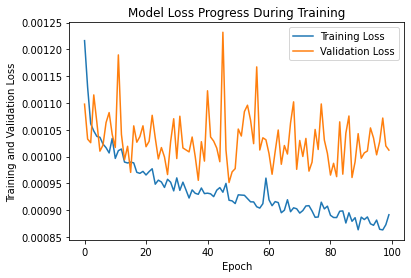

In [41]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss','Validation Loss'])

In [47]:
#bedrooms,bathrooms	sqft_living	sqft_lot	floors	sqft_above	sqft_basement

X_test_1=np.array([[4,3,1960, 5000,1,2000,3000]])
Scaler_1=MinMaxScaler()
X_test_scaled_1=Scaler_1.fit_transform(X_test_1)

y_predict_1=model.predict(X_test_scaled_1)
y_predict_1
y_predict_1 =scaler.inverse_transform(y_predict_1)
y_predict_1

array([[258528.72]], dtype=float32)

Text(0, 0.5, 'True Values')

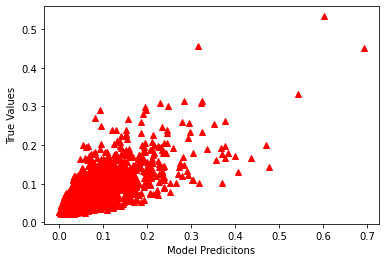

In [49]:
#Visualizing model prediciton and the actual (normalized data)
y_predict=model.predict(X_test)
plt.plot(y_test, y_predict, "^", color='r')
plt.xlabel('Model Predicitons')
plt.ylabel('True Values')

In [50]:
# The model does not really do a good job. Its not straight. It dispersed all over the place


In [54]:
y_predict_orig=scaler.inverse_transform(y_predict)
y_test_orig=scaler.inverse_transform(y_test)




(0.0, 3000000.0)

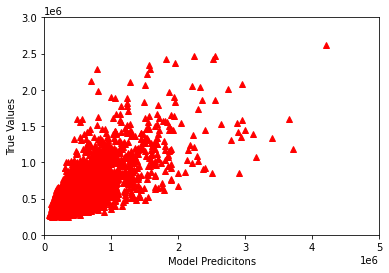

In [56]:
#Visualizing model prediciton and the actual (original datat without normalization)
plt.plot(y_test_orig, y_predict_orig, "^", color='r')
plt.xlabel('Model Predicitons')
plt.ylabel('True Values')
plt.xlim(0, 5000000)
plt.ylim(0, 3000000)

In [58]:
# Errors KPI's
k=X_test.shape[1]  #Numbers of features
n=len(X_test) #Number of sample

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE=float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)), '.3f'))
MSE=mean_squared_error(y_test_orig, y_predict_orig)
MAE=mean_absolute_error(y_test_orig, y_predict_orig)
r2=r2_score(y_test_orig, y_predict_orig)
adj_r2=1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =', RMSE, '\nMSE = ', MSE, '\nMAE= ', MAE, '\nR2 = ', r2, '\nAdjsuted R2= ', adj_r2)

RMSE = 237178.336 
MSE =  56253563001.98052 
MAE=  159381.28031030257 
R2 =  0.5499725367466406 
Adjsuted R2=  0.5493887353673275


MULTIPLE LINEAR REGRESSION ON THE SAME DATA

In [60]:
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement
0,3,1.00,1180,5650,1.0,1180,0
1,3,2.25,2570,7242,2.0,2170,400
2,2,1.00,770,10000,1.0,770,0
3,4,3.00,1960,5000,1.0,1050,910
4,3,2.00,1680,8080,1.0,1680,0
...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,1530,0
21609,4,2.50,2310,5813,2.0,2310,0
21610,2,0.75,1020,1350,2.0,1020,0
21611,3,2.50,1600,2388,2.0,1600,0


In [61]:
y

array([[221900.],
       [538000.],
       [180000.],
       ...,
       [402101.],
       [400000.],
       [325000.]])

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test =train_test_split(X, y, test_size=0.25)


In [65]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression(fit_intercept=True)
regressor.fit(X_train,y_train)
print('Linear Model Coef (m)', regressor.coef_)
print('Linear Model Coef (b)', regressor.intercept_)

Linear Model Coef (m) [[-5.96191646e+04  8.38361163e+03  2.15518787e+02 -3.71043169e-01
   6.68395491e+03  9.05007427e+01  1.25018044e+02]]
Linear Model Coef (b) [72560.20630156]


In [66]:
y_predict=regressor.predict(X_test)

(0.0, 3000000.0)

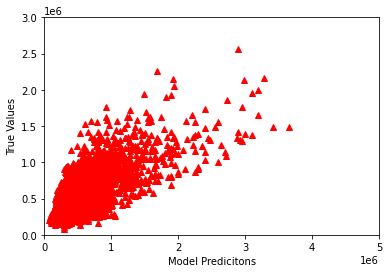

In [67]:
#Visualizing model prediciton and the actual (original datat without normalization)
plt.plot(y_test, y_predict, "^", color='r')
plt.xlabel('Model Predicitons')
plt.ylabel('True Values')
plt.xlim(0, 5000000)
plt.ylim(0, 3000000)

In [ ]:
#The results are pretty much the same

In [68]:
# Errors KPI's
k=X_test.shape[1]  #Numbers of features
n=len(X_test) #Number of sample

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE=float(format(np.sqrt(mean_squared_error(y_test, y_predict)), '.3f'))
MSE=mean_squared_error(y_test, y_predict)
MAE=mean_absolute_error(y_test, y_predict)
r2=r2_score(y_test, y_predict)
adj_r2=1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =', RMSE, '\nMSE = ', MSE, '\nMAE= ', MAE, '\nR2 = ', r2, '\nAdjsuted R2= ', adj_r2)



RMSE = 250675.443 
MSE =  62838177583.29427 
MAE=  168539.69191400215 
R2 =  0.517496785962776 
Adjsuted R2=  0.5168708551810376


In [ ]:
#The results are pretty much the same

Model Improvement Attempt

In [72]:
#To split test and training Data and cleaning
selected_features= ['bedrooms',	'bathrooms',	'sqft_living',	'sqft_lot','floors',	'waterfront','view',
                    'condition',	'grade',	'sqft_above',	'sqft_basement',	'yr_built',	'yr_renovated',	'zipcode',	'lat',	'long'	,'sqft_living15','sqft_lot15']

In [73]:
X= house_df[selected_features]

In [74]:
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [76]:
y=house_df['price']

In [77]:
y

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

In [78]:
X.shape

(21613, 18)

In [79]:
y.shape

(21613,)

In [81]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)

In [82]:
X_scaled

array([[0.09090909, 0.125     , 0.06716981, ..., 0.21760797, 0.16193426,
        0.00574235],
       [0.09090909, 0.28125   , 0.17207547, ..., 0.16611296, 0.22216486,
        0.00802712],
       [0.06060606, 0.125     , 0.03622642, ..., 0.23754153, 0.3994149 ,
        0.00851302],
       ...,
       [0.06060606, 0.09375   , 0.05509434, ..., 0.18272425, 0.10686629,
        0.00155764],
       [0.09090909, 0.3125    , 0.09886792, ..., 0.37375415, 0.17398038,
        0.00073057],
       [0.06060606, 0.09375   , 0.05509434, ..., 0.18272425, 0.10686629,
        0.00081098]])

In [83]:
X_scaled.shape

(21613, 18)

In [87]:
y=y.values.reshape(-1,1)

In [88]:
y_scaled=scaler.fit_transform(y)

In [89]:
y_scaled

array([[0.01926557],
       [0.06072131],
       [0.01377049],
       ...,
       [0.04289849],
       [0.04262295],
       [0.03278689]])

In [90]:
#To split into train and test data and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_scaled, y_scaled, test_size=0.25)

In [92]:
X_train.shape

(16209, 18)

In [93]:
X_test.shape

(5404, 18)

In [94]:
#To build model
import tensorflow.keras 
from keras.models import Sequential
from keras.layers import Dense

In [99]:
model=Sequential()
model.add(Dense(50, input_dim=18, activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(1,activation='linear'))

In [100]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 50)                950       
_________________________________________________________________
dense_12 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_13 (Dense)             (None, 100)               5100      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 101       
Total params: 8,701
Trainable params: 8,701
Non-trainable params: 0
_________________________________________________________________


In [101]:
model.compile(optimizer='Adam',loss='mean_squared_error')

In [102]:
epochs_hist=model.fit(X_train, y_train, epochs=100, batch_size=50, validation_split=0.2)

Epoch 1/100
260/260 [==============================] - 1s 3ms/step - loss: 0.0019 - val_loss: 4.7680e-04
Epoch 2/100
260/260 [==============================] - 1s 2ms/step - loss: 5.9173e-04 - val_loss: 5.9023e-04
Epoch 3/100
260/260 [==============================] - 1s 2ms/step - loss: 5.7222e-04 - val_loss: 4.2510e-04
Epoch 4/100
260/260 [==============================] - 1s 2ms/step - loss: 4.8495e-04 - val_loss: 4.4149e-04
Epoch 5/100
260/260 [==============================] - 1s 2ms/step - loss: 4.3853e-04 - val_loss: 3.6084e-04
Epoch 6/100
260/260 [==============================] - 1s 2ms/step - loss: 4.3095e-04 - val_loss: 5.3405e-04
Epoch 7/100
260/260 [==============================] - 1s 2ms/step - loss: 4.1057e-04 - val_loss: 4.1428e-04
Epoch 8/100
260/260 [==============================] - 1s 2ms/step - loss: 3.9753e-04 - val_loss: 3.4959e-04
Epoch 9/100
260/260 [==============================] - 1s 2ms/step - loss: 3.6130e-04 - val_loss: 3.1251e-04
Epoch 10/100
260/260 [=

In [103]:
#Evaluating the model
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

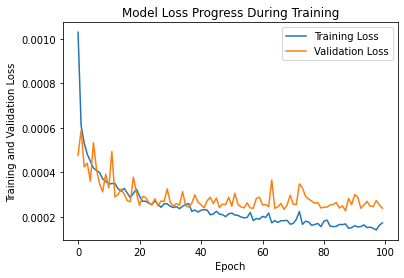

In [104]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss','Validation Loss'])

Text(0, 0.5, 'True Values')

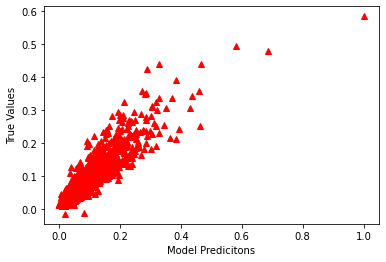

In [105]:
#Visualizing model prediciton and the actual (normalized data)
y_predict=model.predict(X_test)
plt.plot(y_test, y_predict, "^", color='r')
plt.xlabel('Model Predicitons')
plt.ylabel('True Values')

In [107]:
y_predict_orig=scaler.inverse_transform(y_predict)
y_test_orig=scaler.inverse_transform(y_test)

(0.0, 3000000.0)

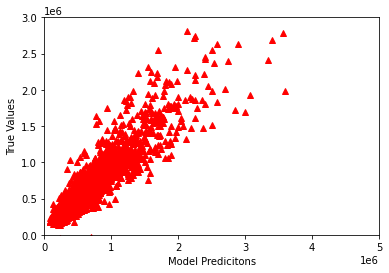

In [108]:
#Visualizing model prediciton and the actual (original datat without normalization)
plt.plot(y_test_orig, y_predict_orig, "^", color='r')
plt.xlabel('Model Predicitons')
plt.ylabel('True Values')
plt.xlim(0, 5000000)
plt.ylim(0, 3000000)



In [110]:
# Errors KPI's
k=X_test.shape[1]  #Numbers of features
n=len(X_test) #Number of sample

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE=float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)), '.3f'))
MSE=mean_squared_error(y_test_orig, y_predict_orig)
MAE=mean_absolute_error(y_test_orig, y_predict_orig)
r2=r2_score(y_test_orig, y_predict_orig)
adj_r2=1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =', RMSE, '\nMSE = ', MSE, '\nMAE= ', MAE, '\nR2 = ', r2, '\nAdjsuted R2= ', adj_r2)



RMSE = 138137.807 
MSE =  19082053779.41151 
MAE=  77023.40009895737 
R2 =  0.8637198884330891 
Adjsuted R2=  0.8632643560267373


In [ ]:
#The model is way better with more features